データサイエンス特別PG データサイエンス特論 第13回 主成分分析

In [26]:
# google colab で実行する場合は下記のコメントアウトを外して実行する
# ! wget https://raw.githubusercontent.com/KHiraGit/sudspg_ds/main/ic_103_decathlon.csv

# 下記を参考に作成
# https://santakalog.com/2021/02/13/python-pca/

In [4]:
# ライブラリをインポート
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
import openpyxl

In [7]:
# ファミレスのデータを読み込んでデータフレームを作成
famires_df = pd.read_excel('AI08_famires_data.xlsx')
famires_df.head()

,ID,滞在時間（分）,注文金額（円）,支払方法
0,客1,26,893,ICカード
1,客2,67,2030,クレジットカード
2,客3,24,927,クレジットカード
3,客4,79,777,クレジットカード
4,客5,92,2378,クレジットカード


Text(0, 0.5, '注文金額（円）')

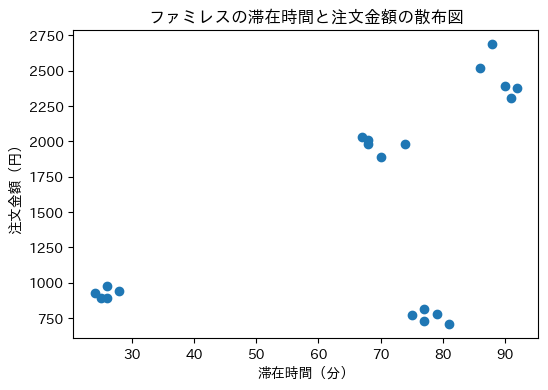

In [14]:
# 散布図を表示
plt.figure(figsize=(6,4))
plt.scatter(famires_df['滞在時間（分）'], famires_df['注文金額（円）'])
plt.title("ファミレスの滞在時間と注文金額の散布図")
plt.xlabel("滞在時間（分）")
plt.ylabel("注文金額（円）")

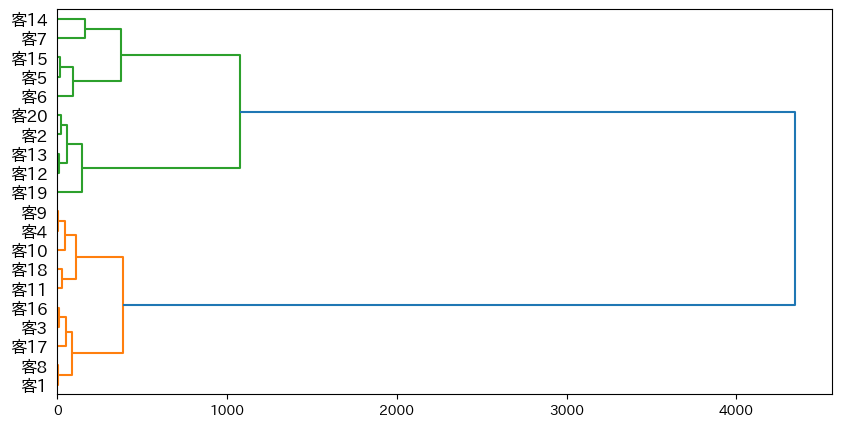

In [12]:
# クラスター間の距離を計算 (ユークリッド距離を利用)
dist = hierarchy.distance.pdist(famires_df.drop(columns=['ID', '支払方法']), metric='euclidean')
# クラスターを統合 (ward法)
linkage = hierarchy.linkage(dist, method='ward', metric='euclidean') 
# デンドログラムを表示
fig, ax = plt.subplots(figsize=(10,5))
ax = hierarchy.dendrogram(Z=linkage, orientation='right', labels=famires_df['ID'].tolist())

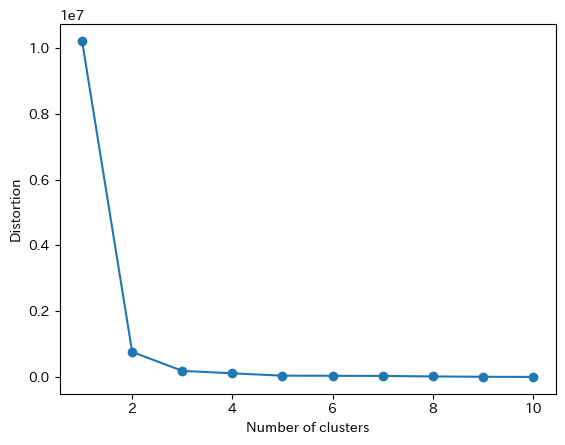

In [21]:
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i, n_init='auto', max_iter=30, random_state=0)
    km.fit(famires_df.drop(columns=['ID', '支払方法']))
    distortions.append(km.inertia_)

# plt.figure(figsize=(10,4))
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

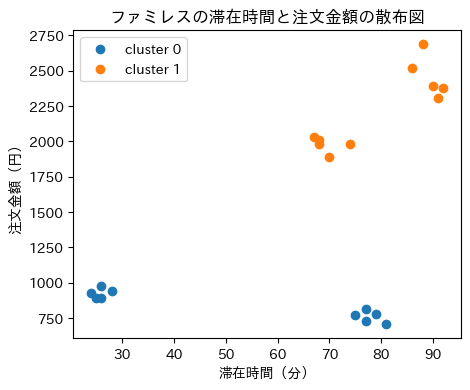

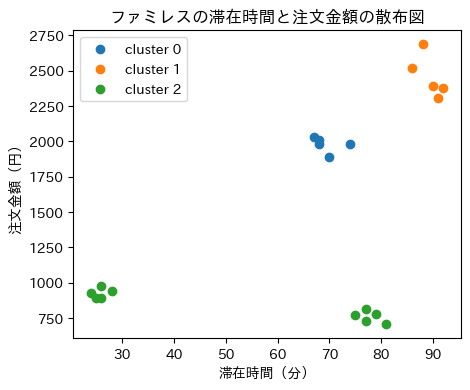

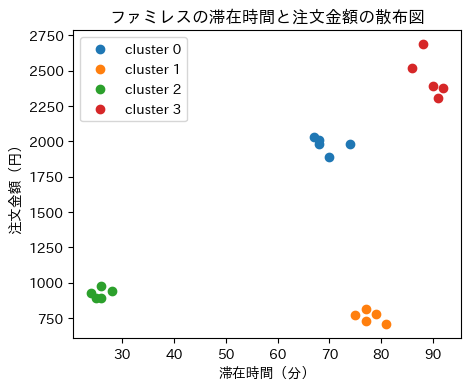

In [46]:
# kmeans法を実行
for k in [2,3,4]:
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=30, init="random")
    cluster = kmeans.fit_predict(famires_df.drop(columns=['ID', '支払方法']))

    # 結果を表示
    famires_result = famires_df.drop(columns=['ID', '支払方法']).copy()
    famires_result["cluster"] = [x for x in cluster]
    cluster_list = list(set(cluster))
    plt.figure(figsize=(5,4))
    cmap = plt.get_cmap("tab10")
    for _cluster in cluster_list:
        tmp_df = famires_result[famires_result["cluster"]==_cluster]
        plt.scatter(tmp_df['滞在時間（分）'], tmp_df['注文金額（円）'], c=[cmap(_cluster)], label=f'cluster {_cluster}')
    plt.legend()
    plt.title("ファミレスの滞在時間と注文金額の散布図")
    plt.xlabel("滞在時間（分）")
    plt.ylabel("注文金額（円）")
    plt.show()